## Question 1

Implement the Perceptron algorithm from scratch in Python.
- Initialize the weights with [0 0 0] and a learning rate of 0.0001.
- For each iteration, calculate the output of the Perceptron for each input in the training set.
- Use MSE to computer the error for all samples
- Update the weights using the gradient descent procedure.
- Repeat the above steps until the Perceptron converges or a maximum number of iterations is reached.
- Test the trained Perceptron on a separate test set.
- Use the step function as an activation function in the output layer


Use the IRIS Dataset for the above, considering all the four features : sepal length, sepal width, petal length, and petal width, but only two classes -  Setosa, Versicolor.  Drop the feature vectors of the other class. 
Please find the dataset below.

NOTE - Do not use inbuilt functions for perceptron.

In [18]:
# import the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# import the dataset
dataset = pd.read_csv('iris.csv')

dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
# get all the unique species
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
# consider only iris-setosa and iris-versicolor
dataset = dataset[dataset['Species'] != 'Iris-virginica']

dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [22]:
# X is a feature vector that contains sepal length, sepal width, petal length, and petal width 
X = dataset.iloc[:, 1:5].values

# y is a vector that contains the species of the flowers
y = dataset.iloc[:, -1].values



In [23]:
print(X.shape)
print(X[0:5])
print(y.shape)
print(y[0:5])

(100, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(100,)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


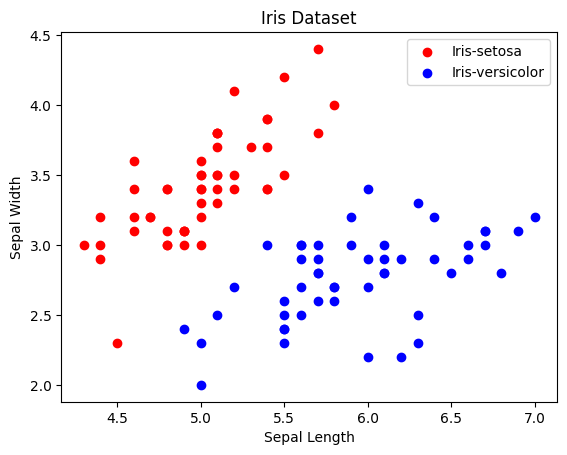

In [24]:
# plot the 2 features of the flowers
plt.scatter(X[y == 'Iris-setosa', 0], X[y == 'Iris-setosa', 1], color = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 'Iris-versicolor', 0], X[y == 'Iris-versicolor', 1], color = 'blue', label = 'Iris-versicolor')
plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [25]:
# we define the class labels to be 0 and 1

# split the 2 classes with +1 and -1 labels
y = np.where(y == 'Iris-setosa', 0, 1)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# training set
X_train = np.concatenate((X[:40], X[50:90]))
y_train = np.concatenate((y[:40], y[50:90]))

# testing set
X_test = np.concatenate((X[40:50], X[90:]))
y_test = np.concatenate((y[40:50], y[90:]))

In [27]:
# Augmenting the feature vector with 1
X_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis = 1)
X_test = np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1)

X_train

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [28]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# initialize the weights to zeros 
W = np.zeros(X_train.shape[1])

lr = 0.0001

W

array([0., 0., 0., 0., 0.])

Suppose that the perceptron is defined by the weights $W=(w_1,w_2,w_3, w_4, w_5)$,which can initially be zero, and we have the input vector $X_i=(x_{i1},x_{i2},x_{i3}, x_{i4}, 1)$, for i=1,…,n, where n is the size of the training dataset, which can be defined as D={(X1,t1),…,(Xn,tn)}. 

Then, for the ith pair of the training dataset D, the output of the perceptron is defined as a linear combination

$$y_i=W⋅X_i$$

where $y_i$ is the output of the perceptron for the training example $X_i$. 

The loss for the training example $(X_i,t_i)$ can be defined as follows

$$MSE(X_i,t_i)=(y_i−t_i)2=(W⋅X_i−t_i)^2=((w_1.x_{i1}+w_2⋅x_{i2}+w_3⋅x_{i3} + w_4⋅x_{i4} + w_5)−ti)^2$$

To update the weights W , we need to find the partial derivative of $MSE(X_i,t_i)$ with respect to each weight, $w_1 , w_2, w_3$ and $w_4$ . The gradient of $MSE(X_i,t_i)$ , denoted by $\nabla_W \operatorname{MSE}(X_i, t_i)$ , that is, the vector containing the partial derivatives of $MSE(X_i,t_i)$ with respect to each element of $W , w_1 , w_2, w_3, w_4, w_5$, can be calculated as follows

\begin{align}
\nabla_W \operatorname{MSE}(X_i, t_i) 
&= 
\begin{bmatrix} 
\frac{\partial \operatorname{MSE}(X_i, t_i) }{ w_1}\\
\frac{\partial \operatorname{MSE}(X_i, t_i) }{ w_2}\\
\frac{\partial \operatorname{MSE}(X_i, t_i) }{ w_3}\\
\frac{\partial \operatorname{MSE}(X_i, t_i) }{ w_4} \\
\frac{\partial \operatorname{MSE}(X_i, t_i) }{ w_5}
\end{bmatrix}\\
&= 
\begin{bmatrix} 
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) \frac{\partial}{w_1} (w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5)\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) \frac{\partial}{w_2} (w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5)\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) \frac{\partial}{w_3} (w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5)\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4}  + w_5+ w_5) - t_i) \frac{\partial}{w_4} (w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) \\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4}  + w_5+ w_5) - t_i) \frac{\partial}{w_5} (w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5)
\end{bmatrix}\\
&= 
\begin{bmatrix} 
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) x_{i1}\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) x_{i2}\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) x_{i3}\\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) x_{i4} \\
2((w_1 x_{i1} + w_2 \cdot x_{i2} + w_3 \cdot x_{i3} + w_4 \cdot x_{i4} + w_5) - t_i) 
\end{bmatrix}\\
&= 
\begin{bmatrix} 
2(y_i - t_i) x_{i1}\\
2(y_i - t_i) x_{i2}\\
2(y_i - t_i) x_{i3}\\
2(y_i - t_i) x_{i4} \\
2(y_i - t_i)
\end{bmatrix}
\end{align}

We can then update the weights of the perceptron using a step of gradient descent

$$W = W - \eta \nabla_W \operatorname{MSE}(X_i, t_i)$$

where $\eta$ is the learning rate.

In [30]:
# Train the Perceptron until all points are correctly classified and update the weights using the stochastic gradient descent rule

k = 1

while True:
    for i in range(X_train.shape[0]):
        y_pred = np.dot(W, X_train[i])  
        error = y_pred - y_train[i]
        if y_pred >= 0.5 and y_train[i] == 0:
            W -= lr * 2*error * X_train[i]
        elif y_pred < 0.5 and y_train[i] == 1:
            W -= lr * 2*error * X_train[i]

    count = 0
    for i in range(X_train.shape[0]):
        if np.dot(W.T, X_train[i]) >= 0.5 and y_train[i] == 1 or np.dot(W.T, X_train[i]) < 0.5 and y_train[i] == 0:
            count += 1
    print('Iteration: {} => {} points correctly classified'.format(k, count))

    if count == X_train.shape[0]:
        break
    k += 1    

Iteration: 1 => 40 points correctly classified
Iteration: 2 => 73 points correctly classified
Iteration: 3 => 78 points correctly classified
Iteration: 4 => 78 points correctly classified
Iteration: 5 => 78 points correctly classified
Iteration: 6 => 77 points correctly classified
Iteration: 7 => 77 points correctly classified
Iteration: 8 => 76 points correctly classified
Iteration: 9 => 77 points correctly classified
Iteration: 10 => 77 points correctly classified
Iteration: 11 => 77 points correctly classified
Iteration: 12 => 77 points correctly classified
Iteration: 13 => 77 points correctly classified
Iteration: 14 => 77 points correctly classified
Iteration: 15 => 78 points correctly classified
Iteration: 16 => 78 points correctly classified
Iteration: 17 => 78 points correctly classified
Iteration: 18 => 78 points correctly classified
Iteration: 19 => 78 points correctly classified
Iteration: 20 => 78 points correctly classified
Iteration: 21 => 78 points correctly classified
I

In [31]:
W

array([0.01000609, 0.05605362, 0.02169931, 0.04587027, 0.01433344])

In [32]:
# get the accurracy in the testing set
count = 0
for i in range(X_test.shape[0]):
    if np.dot(W.T, X_test[i]) >= 0.5 and y_test[i] == 1 or np.dot(W.T, X_test[i]) < 0.5 and y_test[i] == 0:
        count += 1

print('Accuracy: {}%'.format(count/X_test.shape[0] * 100))

Accuracy: 100.0%
